In [1]:
import time, array, random, copy, math
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] ='\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}'

import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

In [3]:
from deap import algorithms, base, benchmarks, tools, creator

In [4]:
#To make XFoil work:

import os
import string
import deap
from deap import tools, base
import random
import pandas
import numpy as np
import XFoilGame

#Go to directory
os.chdir("/home/simonx/Documents/Udacity/ML/Projects/capstone/Pareto/Archive")

In [5]:
#For acquisition function
import numpy as np
import sympy as sp
sp.init_printing()
from numpy import sin, exp, cos
from sklearn.preprocessing import normalize
from scipy.stats import norm
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
%matplotlib inline

# Visualizing the Pareto dominance relation

* To start, lets have a visual example of the Pareto dominance relationship in action.
* In this notebook we will deal with two-objective problems in order to simplify visualization. 
* Therefore, we can create:

In [6]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", array.array, typecode='d', 
               fitness=creator.FitnessMin)

## Let's use an illustrative MOP problem: Dent

$$
\begin{array}{rl}
\text{minimize} & f_1(\vec{x}),f_2(\vec{x}) \\
\text{such that} & f_1(\vec{x}) = \frac{1}{2}\left( \sqrt{1 + (x_1 + x_2)^2} \sqrt{1 + (x_1 - x_2)^2} + x_1 -x_2\right) + d,\\
 & f_2(\vec{x}) = \frac{1}{2}\left( \sqrt{1 + (x_1 + x_2)^2} \sqrt{1 + (x_1 - x_2)^2} - x_1 -x_2\right) + d,\\
\text{with}& d = \lambda e^{-\left(x_1-x_2\right)^2}\ (\text{generally }\lambda=0.85) \text{ and } \vec{x}\in \left[-1.5,1.5\right]^2.
\end{array}
$$

Implementing the XFoilGame

In [7]:
#Let's simplify the decision space to two variables:
def TwoDXFoilGame(individual):
    print individual
    actions = [individual[0], individual[1], 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
    XFG=XFoilGame.XFoilGame()
    testgen = XFG.newGame(actions)
    #print testgen
    return testgen
    
TwoDXFoilGame([0.06699999999999999, 0.028999999999999998])



    
    
#for loop from previous:
'''
for i in range(1, 3, 1):
    actions = np.random.rand(8)
    #actions=[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
    XFG=XFoilGame.XFoilGame()
    testgen = XFG.newGame(actions)
'''

[0.06699999999999999, 0.028999999999999998]
300000
1 
2 
1 
3 
3 
1 
4 
6 
4 
1 
5 
10 
10 
5 
1 
1 5 10 10 5 1

'\nfor i in range(1, 3, 1):\n    actions = np.random.rand(8)\n    #actions=[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]\n    XFG=XFoilGame.XFoilGame()\n    testgen = XFG.newGame(actions)\n'

In [8]:
toolbox = base.Toolbox()

In [9]:
BOUND_LOW, BOUND_UP = 0.001, 0.3
NDIM = 2
# toolbox.register("evaluate", lambda ind: benchmarks.dtlz2(ind, 2))
toolbox.register("evaluate", TwoDXFoilGame)

Defining attributes, individuals and population.

In [10]:
def uniform(low, up, size=None):
    try:
        return [random.uniform(a, b) for a, b in zip(low, up)]
    except TypeError:
        return [random.uniform(a, b) for a, b in zip([low] * size, [up] * size)]

toolbox.register("attr_float", uniform, BOUND_LOW, BOUND_UP, NDIM)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

Creating an example population distributed as a mesh.

In [11]:
num_samples = 70
limits = [np.arange(BOUND_LOW, BOUND_UP, (BOUND_UP - BOUND_LOW)/num_samples)] * NDIM
sample_x = np.meshgrid(*limits)

In [12]:
flat = []
for i in range(len(sample_x)):
    x_i = sample_x[i]
    flat.append(x_i.reshape(num_samples**NDIM))
print len(x_i[0])

70


In [13]:
example_pop = toolbox.population(n=num_samples**NDIM)

In [14]:
for i, ind in enumerate(example_pop):
    for j in range(len(flat)):
        ind[j] = flat[j][i]
        
        
len(ind)
len(example_pop)

In [15]:
fitnesses = toolbox.map(toolbox.evaluate, example_pop)
for ind, fit in zip(example_pop, fitnesses):
    ind.fitness.values = fit

array('d', [0.001, 0.001])
300000
1 
2 
1 
3 
3 
1 
4 
6 
4 
1 
5 
10 
10 
5 
1 
1 5 10 10 5 1 array('d', [0.005271428571428571, 0.001])
300000
1 
2 
1 
3 
3 
1 
4 
6 
4 
1 
5 
10 
10 
5 
1 
1 5 10 10 5 1 array('d', [0.009542857142857141, 0.001])
300000
1 
2 
1 
3 
3 
1 
4 
6 
4 
1 
5 
10 
10 
5 
1 
1 5 10 10 5 1 array('d', [0.013814285714285713, 0.001])
300000
1 
2 
1 
3 
3 
1 
4 
6 
4 
1 
5 
10 
10 
5 
1 
1 5 10 10 5 1 array('d', [0.018085714285714285, 0.001])
300000
1 
2 
1 
3 
3 
1 
4 
6 
4 
1 
5 
10 
10 
5 
1 
1 5 10 10 5 1 array('d', [0.022357142857142857, 0.001])
300000
1 
2 
1 
3 
3 
1 
4 
6 
4 
1 
5 
10 
10 
5 
1 
1 5 10 10 5 1 array('d', [0.026628571428571425, 0.001])
300000
1 
2 
1 
3 
3 
1 
4 
6 
4 
1 
5 
10 
10 
5 
1 
1 5 10 10 5 1 array('d', [0.030899999999999997, 0.001])
300000
1 
2 
1 
3 
3 
1 
4 
6 
4 
1 
5 
10 
10 
5 
1 
1 5 10 10 5 1 array('d', [0.03517142857142857, 0.001])
300000
1 
2 
1 
3 
3 
1 
4 
6 
4 
1 
5 
10 
10 
5 
1 
1 5 10 10 5 1 array('d', [0.039442857142

We also need `a_given_individual`.

In [16]:
a_given_individual = toolbox.population(n=1)[0]
a_given_individual[0] = 0.01
a_given_individual[1] = 0.01

In [17]:
a_given_individual.fitness.values = toolbox.evaluate(a_given_individual)

array('d', [0.01, 0.01])
300000
1 
2 
1 
3 
3 
1 
4 
6 
4 
1 
5 
10 
10 
5 
1 
1 5 10 10 5 1


Implementing the Pareto dominance relation between two individulas.

In [18]:
def pareto_dominance(ind1,ind2):
    'Returns `True` if `ind1` dominates `ind2`.'
    extrictly_better = False
    for item1 in ind1.fitness.values:
        for item2 in ind2.fitness.values:
            if item1 > item2:
                return False
            if not extrictly_better and item1 < item2:
                extrictly_better = True
    return extrictly_better

In [19]:
def pareto_dominance(x,y):
    return tools.emo.isDominated(x.fitness.values, y.fitness.values)

*Note:* Bear in mind that DEAP comes with a Pareto dominance relation that probably is more efficient than this implementation.
```python
def pareto_dominance(x,y):
    return tools.emo.isDominated(x.fitness.values, y.fitness.values)
```

Lets compute the set of individuals that are `dominated` by `a_given_individual`, the ones that dominate it (its `dominators`) and the remaining ones.

In [20]:
dominated = [ind for ind in example_pop if pareto_dominance(a_given_individual, ind)]
dominators = [ind for ind in example_pop if pareto_dominance(ind, a_given_individual)]
others = [ind for ind in example_pop if not ind in dominated and not ind in dominators]

In [21]:
def plot_dent():
    'Plots the points in decision and objective spaces.'
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    for ind in dominators: plt.plot(ind[0], ind[1], 'r.')
    for ind in dominated: plt.plot(ind[0], ind[1], 'g.')
    for ind in others: plt.plot(ind[0], ind[1], 'k.', ms=3)
    plt.plot(a_given_individual[0], a_given_individual[1], 'bo', ms=6);
    plt.xlabel('$x_1$');plt.ylabel('$x_2$');
    plt.title('Decision space');
    plt.subplot(1,2,2)
    for ind in dominators: plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'r.', alpha=0.7)
    for ind in dominated: plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'g.', alpha=0.7)
    for ind in others: plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'k.', alpha=0.7, ms=3)
    plt.plot(a_given_individual.fitness.values[0], a_given_individual.fitness.values[1], 'bo', ms=6);
    plt.xlabel('$f_1(\mathbf{x})$');plt.ylabel('$f_2(\mathbf{x})$');
    #plt.xlim((-0.75,-0.25));plt.ylim((0.1,0.6));
    plt.title('Objective space');
    plt.tight_layout()

Having `a_given_individual` (blue dot) we can now plot those that are dominated by it (in green), those that dominate it (in red) and those that are uncomparable.

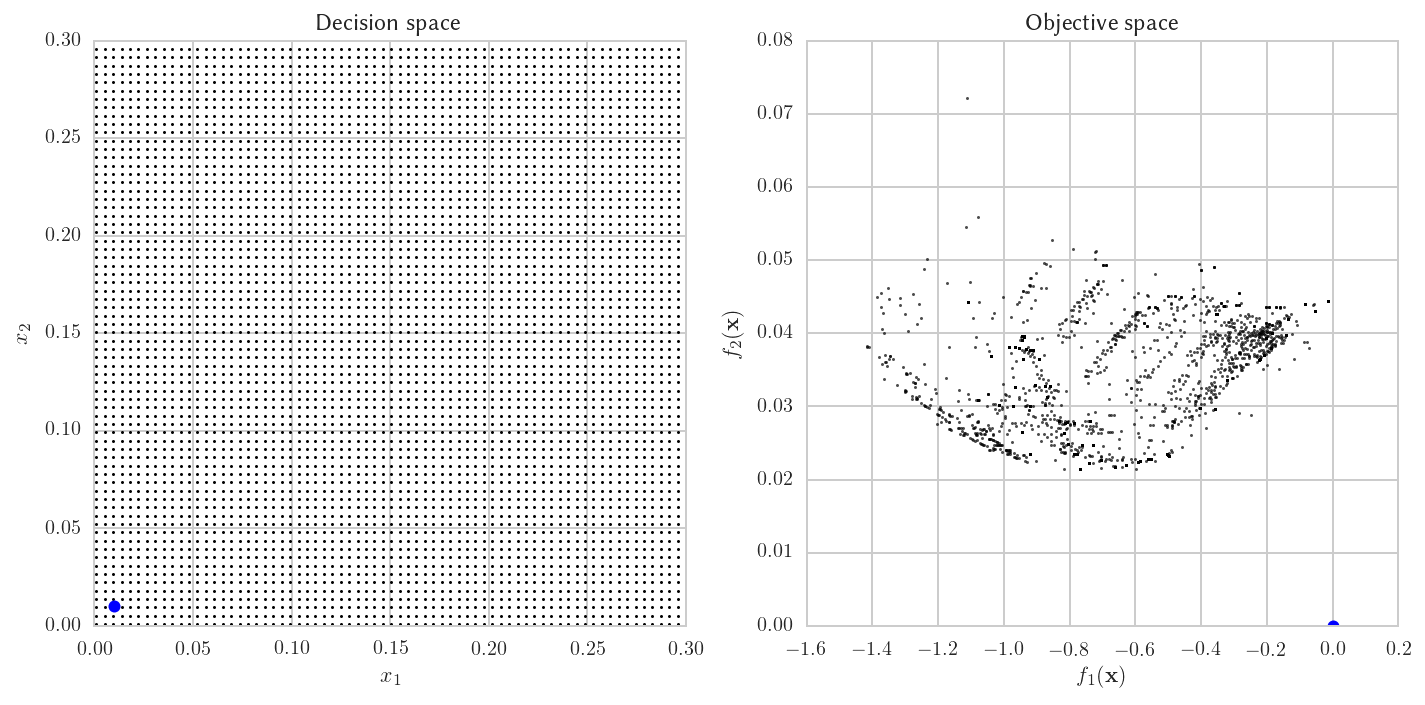

In [22]:
plot_dent()

Obtaining the nondominated front.

In [23]:
non_dom = tools.sortNondominated(example_pop, k=len(example_pop), first_front_only=True)[0]
print non_dom

[array('d', [0.11205714285714284, 0.04371428571428571]), array('d', [0.13768571428571427, 0.04371428571428571]), array('d', [0.17185714285714285, 0.026628571428571425]), array('d', [0.12914285714285714, 0.06079999999999999]), array('d', [0.09497142857142857, 0.03517142857142857]), array('d', [0.12059999999999998, 0.03517142857142857]), array('d', [0.1633142857142857, 0.06507142857142857]), array('d', [0.12059999999999998, 0.026628571428571425]), array('d', [0.18894285714285713, 0.04371428571428571]), array('d', [0.18894285714285713, 0.030899999999999997]), array('d', [0.19748571428571426, 0.047985714285714284]), array('d', [0.001, 0.001]), array('d', [0.005271428571428571, 0.001]), array('d', [0.009542857142857141, 0.001]), array('d', [0.013814285714285713, 0.001]), array('d', [0.018085714285714285, 0.001]), array('d', [0.022357142857142857, 0.001]), array('d', [0.026628571428571425, 0.001]), array('d', [0.030899999999999997, 0.001]), array('d', [0.03517142857142857, 0.001]), array('d'

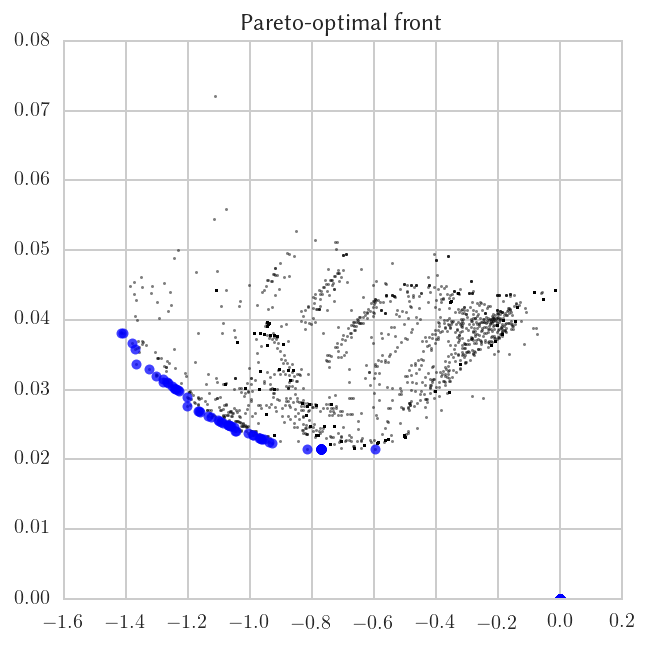

In [24]:
plt.figure(figsize=(5,5))
for ind in example_pop:
    plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'k.', ms=3, alpha=0.5)
for ind in non_dom:
    plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'bo', alpha=0.74, ms=5)
plt.title('Pareto-optimal front')

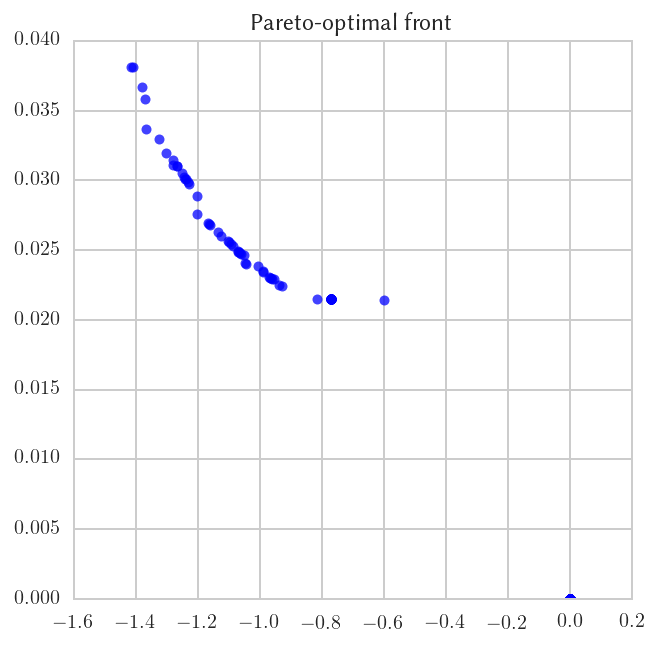

In [26]:
plt.figure(figsize=(5,5))
X_non_dom=[]
Y_non_dom=[]
for ind in non_dom:
    plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'bo', alpha=0.74, ms=5)
    X_non_dom.append(ind.fitness.values[0])
    Y_non_dom.append(ind.fitness.values[1])
plt.title('Pareto-optimal front')
#plt.axis([-1.5, 0, 0,1.5])
#print X_non_dom, Y_non_dom, non_dom

In [27]:



def damped_oscillator(t_vals, g, k, m=1, sigma=0, x0=1):
    X = (np.asarray(X_non_dom))
    X.shape=((len(X_non_dom)),1)
    y = Y_non_dom
    X = (np.asarray(X))
    X.shape=((len(X)),1)
    #X = np.random.randn(10,1)
    
    if g**2 > 4*k*m:
        l1 = (-g**2 + (g**2 - 4*k*m)**0.5) / (2 * m)
        l2 = (-g**2 - (g**2 - 4*k*m)**0.5) / (2 * m)
        c1, c2 = np.linalg.solve([[1, 1], [l1, l2]], [[x0], [0]]).flatten()
        y_vals = X#c1 * exp(t_vals * l1) + c2 * exp(t_vals * l2)
    elif g**2 == 4*k*m:
        l1 = - g / (2 * m)
        c1, c2 = np.linalg.solve([[1, 0], [l1, 1]], [[x0], [0]]).flatten()
        y_vals = X#c1 * exp(t_vals * l1) + c2 * t_vals * exp(t_vals * l1)
    else:
        alpha = - g / (2 * m)
        beta = (4 * m * k - g**2)**0.5 / (2 * m)
        c1, c2 = np.linalg.solve([[1, 0], [alpha, beta]], [[x0], [0]]).flatten()
        y_vals = X#exp(alpha * t_vals) * (c1 * cos(beta * t_vals) + c2 * sin(beta * t_vals))
    y_vals = X
    return y_vals + np.random.randn(len(t_vals)) * sigma

[  0.00000000e+00   2.85551114e-03   5.71102227e-03 ...,   4.99428898e+00
   4.99714449e+00   5.00000000e+00]


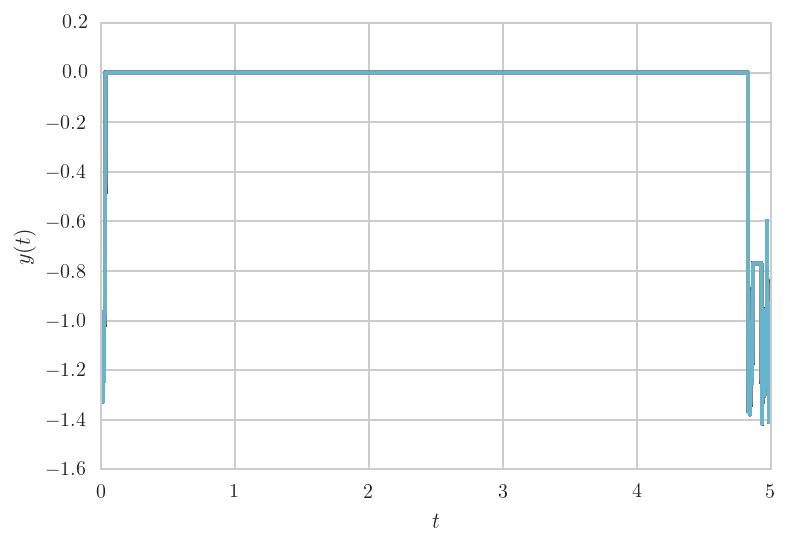

In [28]:
fig, ax = plt.subplots()

t_vals = np.linspace(0, 5, num = len(X_non_dom))
print t_vals
for g in np.logspace(-2, 2, num=4):
    for k in np.logspace(-2, 2, num=4):
        y_vals = damped_oscillator(t_vals, g=g, k=k)
        #print y_vals
        ax.plot(t_vals, y_vals)
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')

In [29]:
# parameters
m=1  # known
kstar=7  # unknown
gstar=1  # unknown
# noisy observations
t_meas = np.linspace(0, 5, num=len(X_non_dom))
y_obs = damped_oscillator(t_meas, g=gstar, k=kstar, m=m, sigma=0.15)
# true function
t_vals = np.linspace(0, 5, num = len(X_non_dom))
y_vals = damped_oscillator(t_vals, g=gstar, k=kstar, m=m)


In [30]:
def get_mse(g, k):
    """
    Computes the mean squared error for a given gamma and k
    """
    y_sim = damped_oscillator(t_meas, g=g, k=k)
    return np.log10(np.mean((y_sim - y_obs)**2))

In [31]:
g_vals = np.logspace(-2, 2, num=100)
k_vals = np.logspace(-2, 2, num=100)

mse_pars = np.zeros((len(g_vals), len(k_vals)))
for i, g in enumerate(g_vals):
    for j, k in enumerate(k_vals):
        mse_pars[i, j] = get_mse(g=g, k=k)

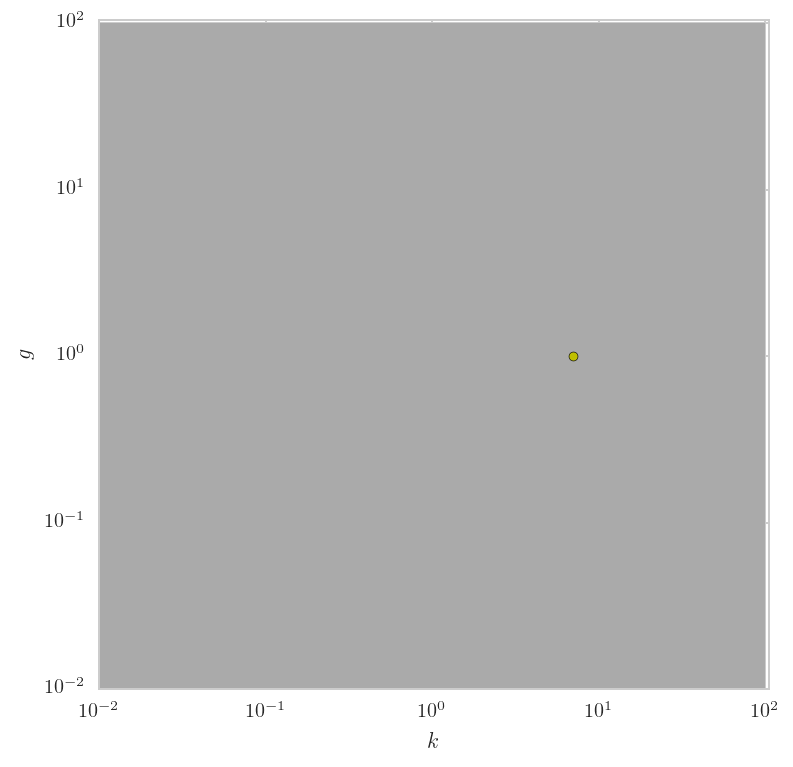

In [32]:
G, K = np.meshgrid(g_vals, k_vals)

fig, ax = plt.subplots(figsize=(6, 6))
ax.contourf(K, G, mse_pars.T)
ax.set_xlabel('$k$')
ax.set_ylabel('$g$')
ax.scatter(kstar, gstar, c='y')
ax.loglog()

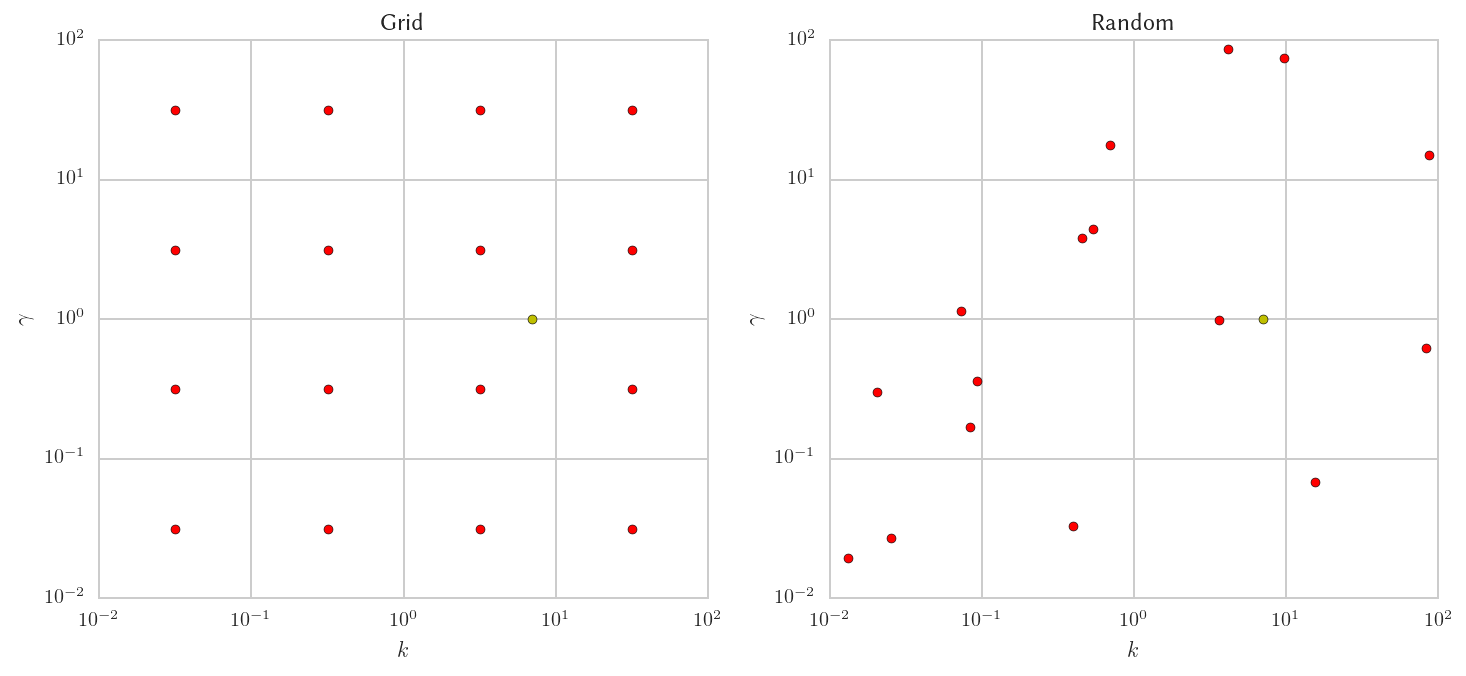

In [33]:
param_grid = np.array([[g, k] for k in np.logspace(-1.5, 1.5, num=4) for g in np.logspace(-1.5, 1.5, num=4)])
param_random = 10**np.random.uniform(-2, 2, size=(16, 2))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 5))

ax0.scatter(param_grid[:,0], param_grid[:,1], c='r')
ax0.set_title('Grid')

ax1.scatter(param_random[:,0], param_random[:,1], c='r')
ax1.set_title('Random')

for ax in (ax1, ax0):
    ax.scatter(kstar, gstar, c='y')
    ax.loglog()
    ax.set_xlabel('$k$')
    ax.set_ylabel('$\gamma$')
    ax.set_ylim([1e-2, 1e2])
    ax.set_xlim([1e-2, 1e2])

In [34]:
# evaluate instances
simulated_parameters = param_random
#simulated_parameters = param_grid
mse_obs = np.array([get_mse(g=g, k=k) for g, k in simulated_parameters])
mse_obs

array([-1.65344225, -1.65344225, -1.65344225, -1.65344225, -1.65344225,
       -1.65344225, -1.65344225, -1.65344225, -1.65344225, -1.65344225,
       -1.65344225, -1.65344225, -1.65344225, -1.65344225, -1.65344225,
       -1.65344225])

In [35]:
gaussian_process = GaussianProcessRegressor(alpha=1e-2)
gaussian_process.fit(np.log10(simulated_parameters), mse_obs)

GaussianProcessRegressor(alpha=0.01, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [36]:
instance = np.log10([[3, 0.1]])

mu, sigma = gaussian_process.predict(instance, return_std=True)
print('Predicted MSE: {} ({})'.format(mu[0], sigma[0]))

Predicted MSE: -1.74314498139 (0.343333731245)


In [37]:
mu_mse = np.zeros_like(mse_pars)
std_mse = np.zeros_like(mse_pars)

for i, g in enumerate(g_vals):
    for j, k in enumerate(k_vals):
        instance = np.log10([[g, k]])
        mu, sigma = gaussian_process.predict(instance, return_std=True)
        mu_mse[i, j] = mu[:]
        std_mse[i, j] = sigma[:]

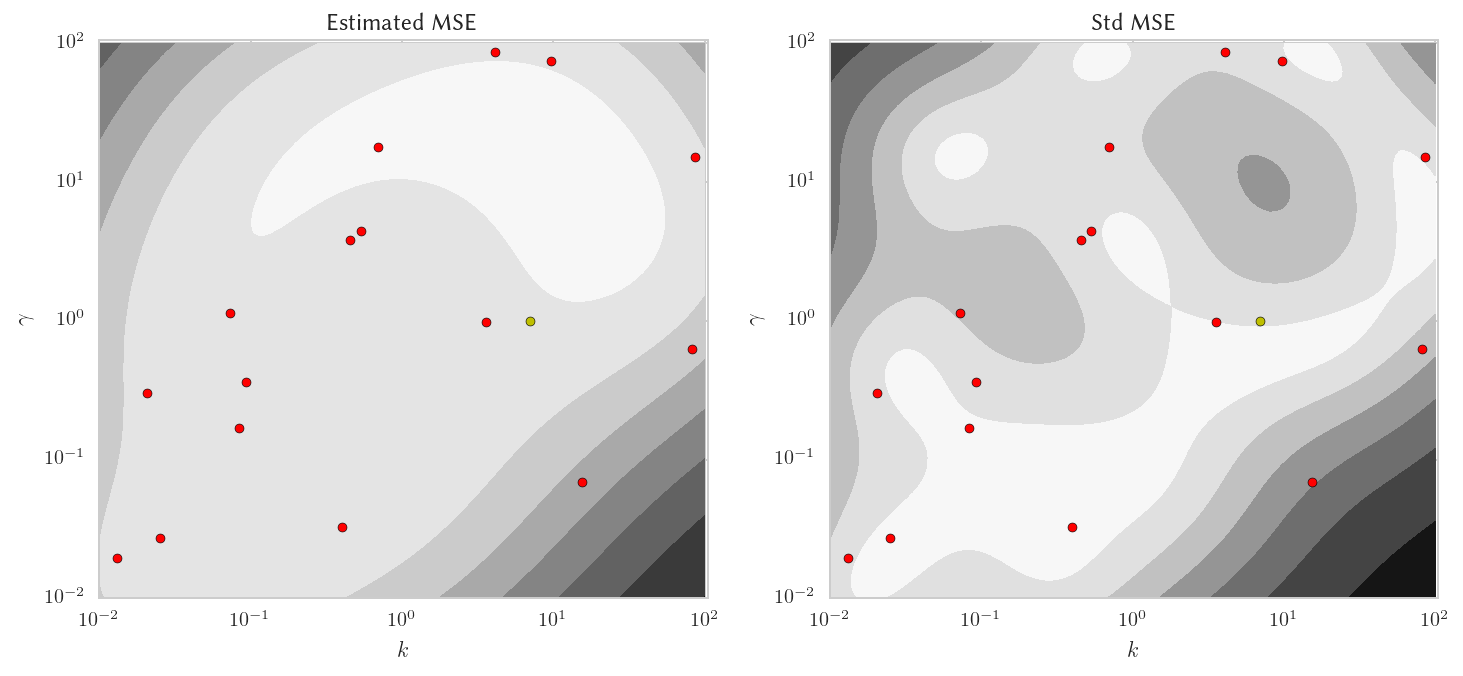

In [38]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 5))
ax0.contourf(K, G, mu_mse.T)
ax0.set_title('Estimated MSE')

ax1.contourf(K, G, std_mse.T)
ax1.set_title('Std MSE')

for ax in (ax0, ax1):
    ax.set_xlabel('$k$')
    ax.set_ylabel('$\gamma$')
    ax.loglog()
    ax.scatter(kstar, gstar, c='y')
    ax.scatter(simulated_parameters[:,0], simulated_parameters[:,1], c='r')

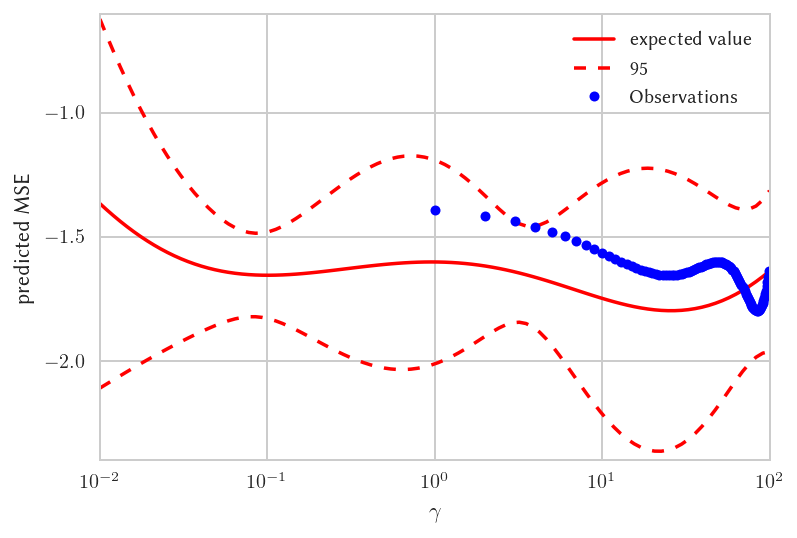

In [39]:
k_slice = np.column_stack((np.logspace(-2, 2, num=100), [1]*100))
# expected mse, std
mu, sigma = gaussian_process.predict(np.log10(k_slice), return_std=True)

fig, ax = plt.subplots()
ax.plot(k_slice[:,0], mu, c='r', label='expected value')
ax.plot(k_slice[:,0], mu-2*sigma, c='r', ls='--', label='95% interval')
ax.plot(k_slice[:,0], mu+2*sigma, c='r', ls='--')
ax.semilogx()
ax.set_xlabel('$\gamma$')
ax.set_ylabel('predicted MSE')
ax.plot(mu, 'b.', markersize=10, label=u'Observations')
ax.legend(loc=0)

In [40]:
def calculate_gamma(mu, sigma, fbest):
    return (fbest - mu) / sigma

def probability_improvement(mu, sigma, fbest=np.min(mse_obs)):
    """
    Calculates probability of improvement
    """
    gamma_values = calculate_gamma(mu, sigma, fbest)
    return norm.cdf(gamma_values)

In [41]:
def expected_improvement(mu, sigma, fbest=np.min(mse_obs)):
    """
    Calculates expected improvement
    """
    gamma_values = calculate_gamma(mu, sigma, fbest)
    return sigma * (gamma_values * norm.cdf(gamma_values) + norm.pdf(gamma_values))

In [42]:
def lower_confidence_bound(mu, sigma, kappa=2):
    """
    Calculates lower confidence bound
    
    Made negative: maximizing acquisition function!
    """
    return - (mu - kappa * sigma)

In [43]:
def plot_acquisitions():
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, sharex=True, figsize=(8, 10))
    
    # plot mu and sigma
    ax0.plot(k_slice[:,0], mu, c='r', label='expected value')
    ax0.plot(k_slice[:,0], mu-2*sigma, c='r', ls='--', label='95% interval')
    ax0.plot(k_slice[:,0], mu+2*sigma, c='r', ls='--')
    ax0.semilogx()
    ax0.set_ylabel('predicted\nMSE')

    # plot information gains
    ax1.plot(k_slice[:,0], probability_improvement(mu, sigma), label='PI')
    ax1.set_ylabel('PI')
    ax2.plot(k_slice[:,0], expected_improvement(mu, sigma), label='EI')
    ax2.set_ylabel('EI')
    ax3.plot(k_slice[:,0], lower_confidence_bound(mu, sigma), label='LCB')
    ax3.set_ylabel('LCB')
    ax3.set_xlabel('$\gamma$')


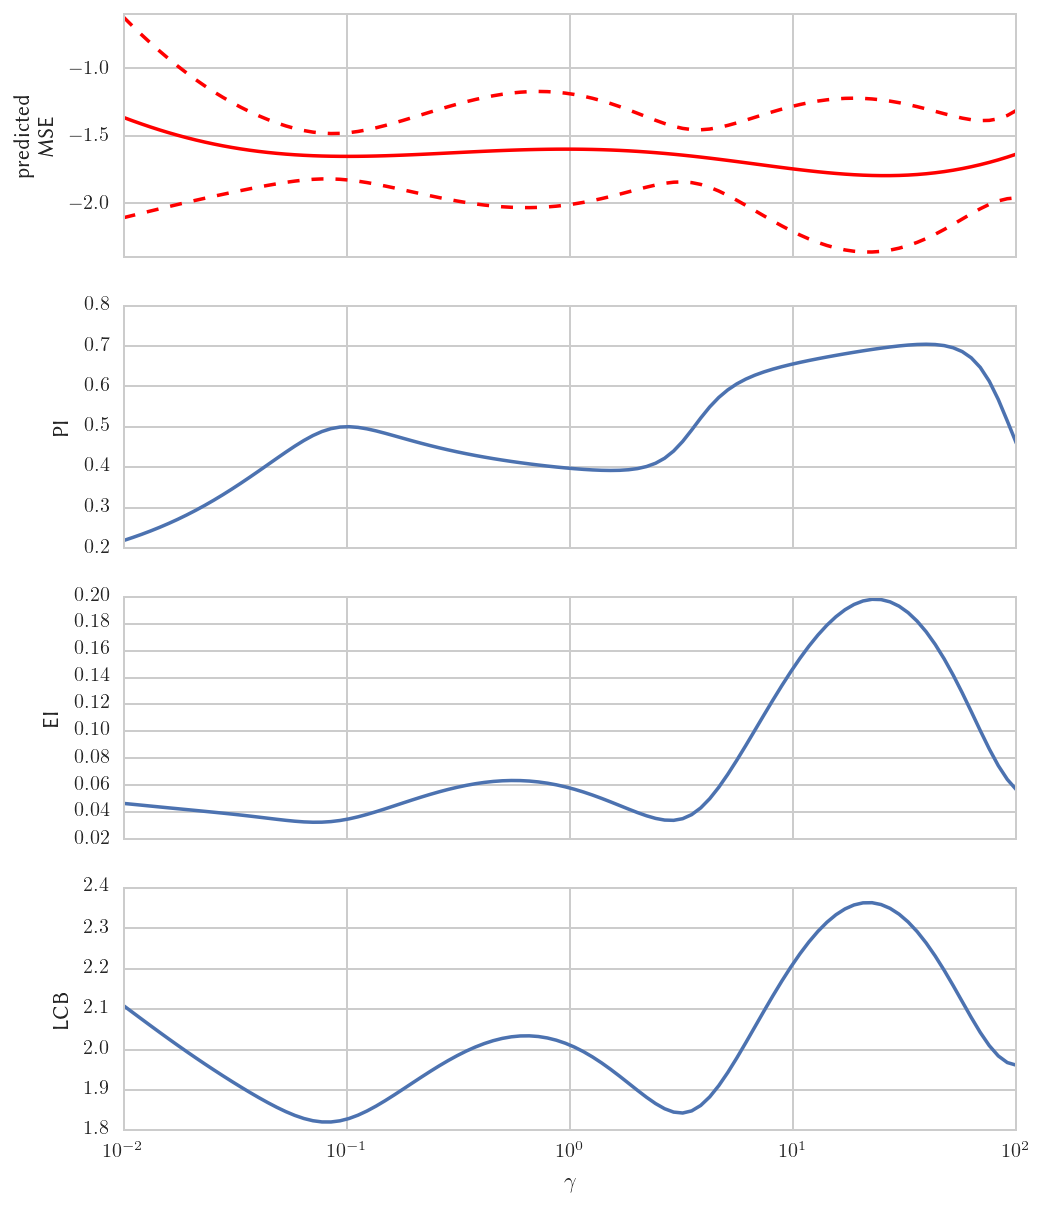

In [44]:
plot_acquisitions()


In [45]:
PI = np.zeros_like(mse_pars)
EI = np.zeros_like(mse_pars)
LCB = np.zeros_like(mse_pars)

for i, g in enumerate(g_vals):
    for j, k in enumerate(k_vals):
        instance = np.log10([[g, k]])
        mu, sigma = gaussian_process.predict(instance, return_std=True)
        mu = mu[:]
        sigma = sigma[:]
        PI[i,j] = probability_improvement(mu, sigma)
        EI[i,j] = expected_improvement(mu, sigma)
        LCB[i,j] = lower_confidence_bound(mu, sigma)

In [46]:
def show_acquisition_contourf(ax0, ax1, ax2):
    ax0.contourf(K, G, PI.T)
    ax0.set_title('PI')
    ax0.scatter(simulated_parameters[:,0], simulated_parameters[:,1], c='r')

    ax1.contourf(K, G, EI.T)
    ax1.set_title('EI')
    ax1.scatter(simulated_parameters[:,0], simulated_parameters[:,1], c='r')

    ax2.contourf(K, G, LCB.T)
    ax2.set_title('LCB')
    ax2.scatter(simulated_parameters[:,0], simulated_parameters[:,1], c='r')

    for ax in (ax0, ax1, ax2):
        ax.set_xlabel('$k$')
        ax.set_ylabel('$\gamma$')
        ax.loglog()
        ax.scatter(kstar, gstar, c='y')
        ax.scatter(simulated_parameters[:,0], simulated_parameters[:,1], c='r')

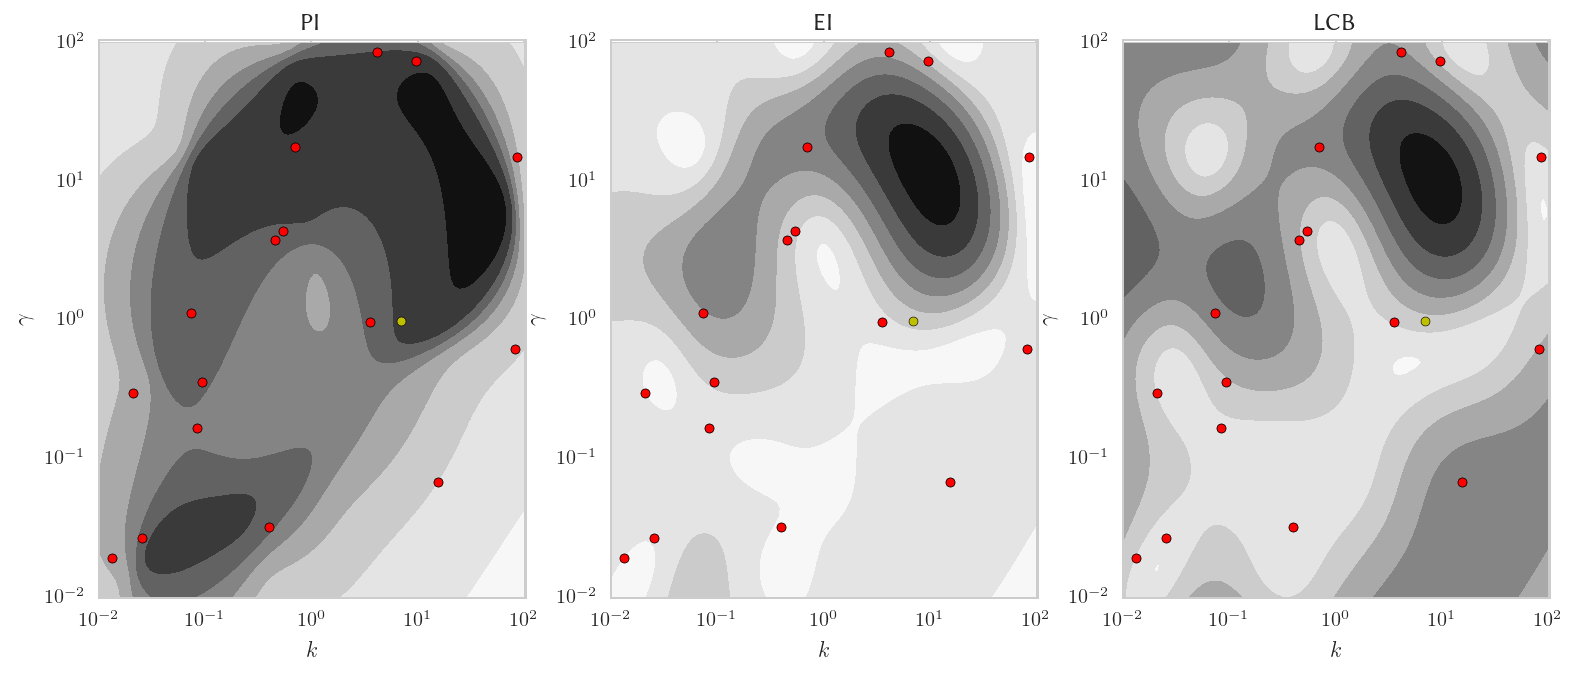

In [47]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(13, 5))
show_acquisition_contourf(ax0, ax1, ax2)

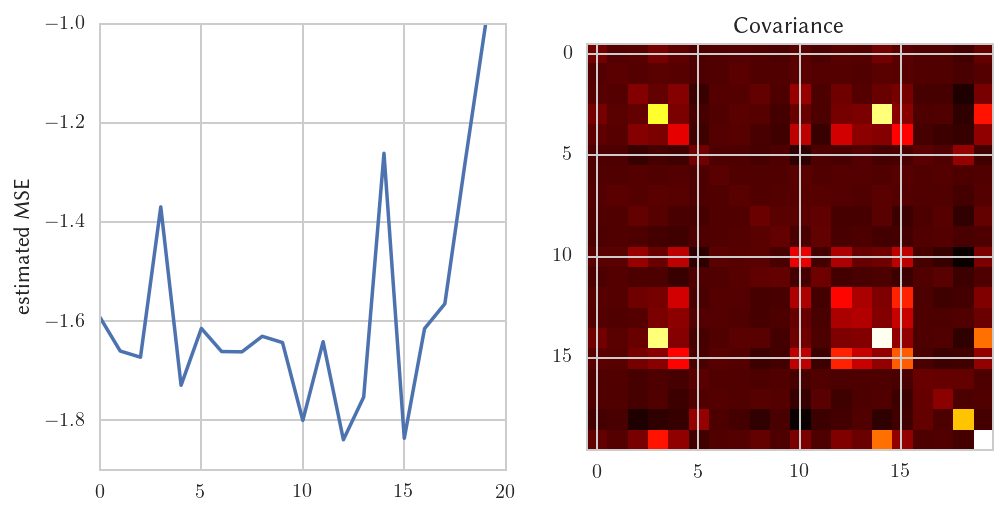

In [48]:
param_random = 10**np.random.uniform(-2, 2, size=(20, 2))

mu, cov = gaussian_process.predict(np.log10(param_random), return_cov=True)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))
ax0.plot(mu)
ax0.set_ylabel('estimated MSE')

ax1.imshow(cov, interpolation='nearest', cmap='hot')
ax1.set_title('Covariance')

[[-1.2655]
 [-1.1621]
 [-1.0715]
 ..., 
 [-1.1334]
 [-1.0626]
 [-1.2024]] [0.03101, 0.02678, 0.02494, 0.02891, 0.03294, 0.03013, 0.02463, 0.03023, 0.02298, 0.02307, 0.02151, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

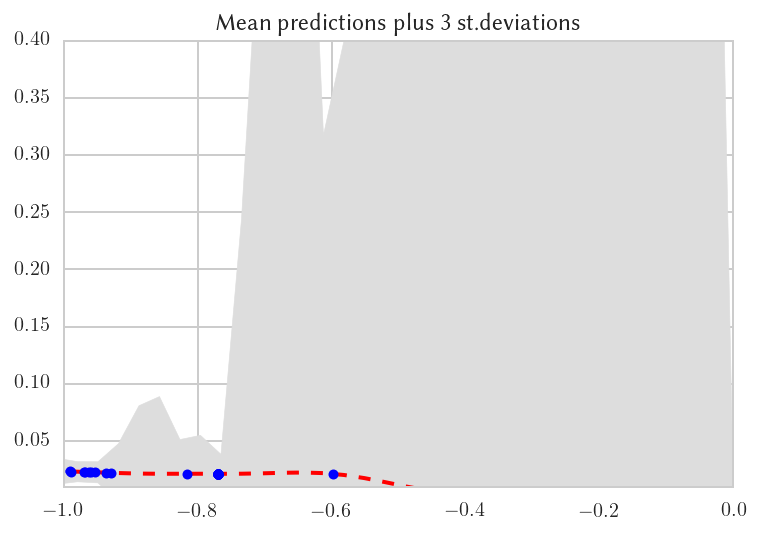

In [49]:
X = [-0.6498, -0.6292, -0.6427, -0.5559, -0.5758, -0.6492, -0.6125] 
Y = [0.24807, 0.23502, 0.23736, 0.23364, 0.23402, 0.24235, 0.23471]

import matplotlib.pyplot as pl

""" This is code for simple GP regression. It assumes a zero mean GP Prior """
f = lambda x: np.sin(0.9*x).flatten()
# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 0.01
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

N = len(X_non_dom)       # number of training points.
n = 50         # number of test points.
s = 0.00005    # noise variance.


# Let's import the Pareto Front points
X = (np.asarray(X_non_dom))
X.shape=((len(X_non_dom)),1)
y = Y_non_dom
print X, y

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))

# points we're going to make predictions at.
Xtest = np.linspace(-1.5, 0, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

# PLOTS:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=2)
#pl.plot(Xtest, f(Xtest), 'b-')
pl.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
plt.plot(X, y, 'b.', markersize=10, label=u'Observations')
pl.savefig('predictive.png', bbox_inches='tight')
pl.title('Mean predictions plus 3 st.deviations')
pl.axis([-1, 0, 0.01,0.4])



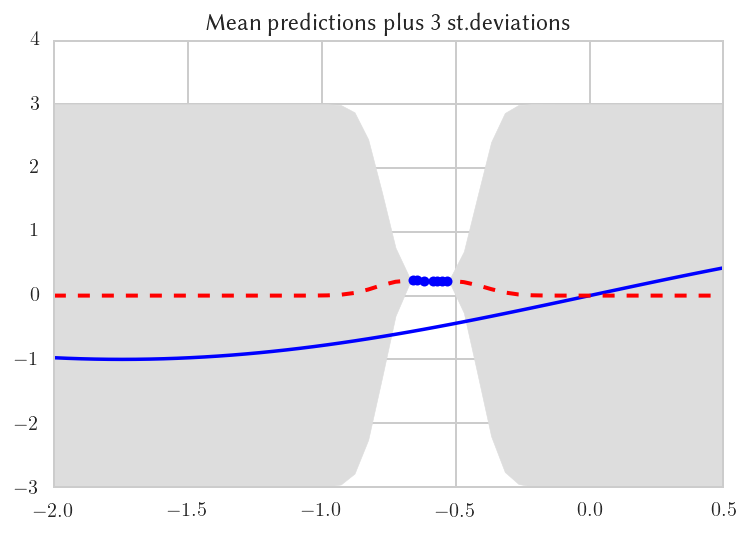

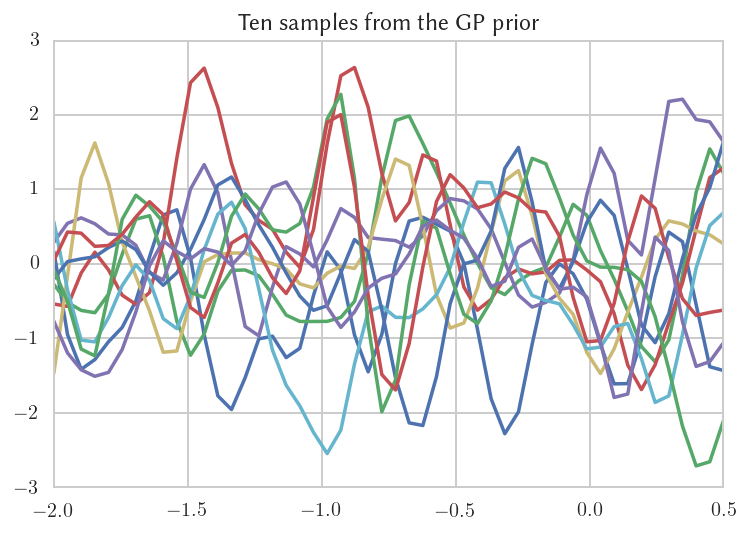

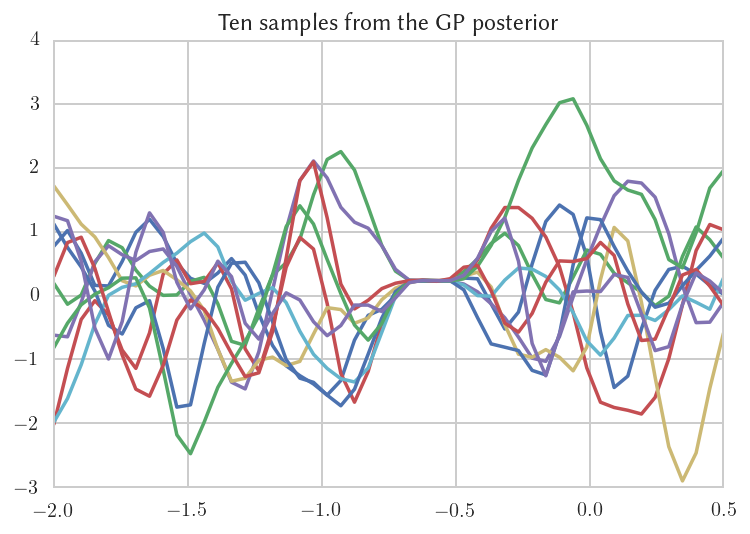

In [97]:
#Let's have a go at doing a Gaussian process ??RBF??
from __future__ import division
import numpy as np
import matplotlib.pyplot as pl

""" This is code for simple GP regression. It assumes a zero mean GP Prior """
f = lambda x: np.sin(0.9*x).flatten()
# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 0.01
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

N = len(X_non_dom)       # number of training points.
n = 50         # number of test points.
s = 0.00005    # noise variance.


# Let's import the Pareto Front points
X = (np.asarray(X_non_dom))
X.shape=((len(X_non_dom)),1)
y = Y_non_dom



K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))

# points we're going to make predictions at.
Xtest = np.linspace(-2, 0.5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)


# PLOTS:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=2)
pl.plot(Xtest, f(Xtest), 'b-')
pl.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
plt.plot(X, y, 'b.', markersize=10, label=u'Observations')
pl.savefig('predictive.png', bbox_inches='tight')
pl.title('Mean predictions plus 3 st.deviations')
#pl.axis([-1.5, 0.5, -1.5,2])

# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))
pl.figure(2)
pl.clf()
pl.plot(Xtest, f_prior)
pl.title('Ten samples from the GP prior')
#pl.axis([-1.5, 0.5, 0,2])
pl.savefig('prior.png', bbox_inches='tight')

# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))
pl.figure(3)
pl.clf()
pl.plot(Xtest, f_post)
pl.title('Ten samples from the GP posterior')
#pl.axis([-2, 0, 0,2])
pl.savefig('post.png', bbox_inches='tight')

pl.show()


#acquisition function
#def acquisitionfunction()